In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
cust=pd.read_csv(r"C:\Users\Haier\Desktop\credit card case st\Customer Acqusition.csv")
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [3]:
cust.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [4]:
cust.drop(['No'],axis=1,inplace=True)

In [5]:
repay=pd.read_csv(r"C:\Users\Haier\Desktop\credit card case st\Repayment.csv")

In [6]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [7]:
spend=pd.read_csv(r"C:\Users\Haier\Desktop\credit card case st\spend.csv")
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
repay.drop(['Unnamed: 4'],axis=1,inplace=True)

In [9]:
cust.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [10]:
repay.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [11]:
repay.drop(['SL No:'],axis=1,inplace=True)

In [12]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [13]:
repay.shape

(1523, 3)

In [14]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [15]:
repay.dropna(axis=0,inplace=True)

In [16]:
repay['Month']=pd.to_datetime(repay['Month'])

In [17]:
repay.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [18]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [19]:
spend.drop(['Sl No:'],axis=1,inplace=True)

In [20]:
spend['Month']=pd.to_datetime(spend['Month'])

In [21]:
spend.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


1. In the above dataset,
a. In case age is less than 18, replace it with mean of age values.

In [22]:
cust.Age.mean()

46.49

In [23]:
cust['Age']=np.where(cust['Age']<18,46.49,cust['Age'])

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [24]:
Customer_Spend=pd.merge(cust,spend,how='left',on='Customer')
Customer_Spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


In [25]:
Customer_Spend['Amount']=np.where(Customer_Spend['Amount']>Customer_Spend['Limit'],Customer_Spend['Limit']/2,Customer_Spend['Amount'])

In [26]:
Customer_Spend.head(10)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
5,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,SANDALS,168285.60
6,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-01,CAR,23370.20
7,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22
8,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-02-05,BUS TICKET,52208.65
9,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68


c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [156]:
repaylimit=pd.merge(cust,repay,how='left',on='Customer')
repaylimit.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


In [157]:
repaylimit['Amount']=np.where(repaylimit['Amount']>repaylimit['Limit'],repaylimit['Limit'],repaylimit['Amount'])

In [158]:
repaylimit.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [30]:
cust['Customer'].drop_duplicates().count()

100

b. How many distinct categories exist?

In [31]:
Customer_Spend['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [32]:
repaylimit['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

c. What is the average monthly spend by customers?

In [33]:
monthly_spend=Customer_Spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
monthly_spend

,Customer,Month,Amount
0,A1,2004-01-03,410556.130
1,A1,2004-01-12,463017.010
2,A1,2004-01-15,23740.460
3,A1,2004-01-25,439656.715
4,A1,2004-02-05,52208.650
...,...,...,...
1252,A95,2004-01-15,240401.500
1253,A96,2004-01-25,54729.660
1254,A97,2004-01-12,5000.000
1255,A98,2004-01-03,5000.500


In [34]:
import datetime as dt

In [35]:
monthly_spend['Spend_Month']=monthly_spend['Month'].dt.month
monthly_spend.drop(['Month'],axis=1,inplace=True)

In [36]:
monthly_spend

,Customer,Amount,Spend_Month
0,A1,410556.130,1
1,A1,463017.010,1
2,A1,23740.460,1
3,A1,439656.715,1
4,A1,52208.650,2
...,...,...,...
1252,A95,240401.500,1
1253,A96,54729.660,1
1254,A97,5000.000,1
1255,A98,5000.500,1


In [37]:
Avg_Spend=monthly_spend.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [38]:
Avg_Spend.head()

,Customer,Spend_Month,Amount
0,A1,1,341332.87700
1,A1,2,138421.15125
2,A1,4,261649.25000
3,A1,5,361141.31000
4,A1,8,344372.10000


d. What is the average monthly repayment by customers?

In [40]:
monthly_repay=repaylimit.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
monthly_repay['repay_Month']=monthly_repay['Month'].dt.month
monthly_repay.drop(['Month'],axis=1,inplace=True)
monthly_repay

,Customer,Amount,repay_Month
0,A1,245899.020,1
1,A1,422930.785,1
2,A1,356258.850,1
3,A1,437555.120,1
4,A1,117964.430,2
...,...,...,...
1276,A95,369405.960,1
1277,A96,100000.000,1
1278,A97,10000.000,1
1279,A98,10001.000,1


In [41]:
avgmonthly_repay=monthly_repay.groupby(['Customer','repay_Month'])[['Amount']].mean().reset_index()
avgmonthly_repay.head()

,Customer,repay_Month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [42]:
# Monthly Profit = Monthly repayment – Monthly spend
avg_monthly_profit=pd.merge(Avg_Spend,avgmonthly_repay,left_on=['Customer','Spend_Month'],right_on=['Customer','repay_Month'])
avg_monthly_profit['Monthly_Profit']=avg_monthly_profit.Amount_y-avg_monthly_profit.Amount_x
avg_monthly_profit['Profit']=np.where(avg_monthly_profit['Monthly_Profit']>0,avg_monthly_profit['Monthly_Profit']*2.9/100,0)
avg_monthly_profit.head(10)

,Customer,Spend_Month,Amount_x,repay_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,0.000000
1,A1,2,138421.151250,2,137713.785000,-707.366250,0.000000
2,A1,4,261649.250000,4,254474.580000,-7174.670000,0.000000
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,0.000000
8,A10,5,189207.392500,5,98672.695000,-90534.697500,0.000000
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


f. What are the top 5 product types?

In [43]:
top_prodcts=Customer_Spend.groupby('Type').Amount.sum().reset_index()
top_prodcts.sort_values('Amount',ascending=False)
top_prodcts.head()

,Type,Amount
0,AIR TICKET,20155847.12
1,AUTO,4806060.41
2,BIKE,7009789.53
3,BUS TICKET,16279935.35
4,CAMERA,27690738.44


g. Which city is having maximum spend?

In [44]:
top_city=Customer_Spend.groupby('City').Amount.sum().reset_index()
top_city.sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


h. Which age group is spending more money?

In [45]:
top_age=Customer_Spend.groupby('Age').Amount.sum().reset_index()
top_age.sort_values('Amount',ascending=False)

,Age,Amount
6,28.00,17365270.23
22,46.49,15872551.38
50,78.00,12329508.54
14,37.00,9992645.71
3,25.00,9749700.72
26,51.00,9670808.79
23,47.00,9157809.12
20,44.00,9002326.39
7,29.00,8231607.26
25,50.00,8082803.39


In [46]:
Customer_Spend['Age_Group']=np.where(((Customer_Spend.Age >= 18) & (Customer_Spend.Age < 25)),'adult',np.where(((Customer_Spend.Age >= 25) & (Customer_Spend.Age < 80)),'senior','youth'))
Customer_Spend.groupby('Age_Group').Amount.sum()

Age_Group
adult     1.468050e+07
senior    2.051006e+08
Name: Amount, dtype: float64

i. Who are the top 10 customers in terms of repayment?

In [47]:
repay_10=repaylimit.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False)
repay_10.head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [48]:
city_wise=Customer_Spend['Yearly_Spend']=Customer_Spend['Month'].dt.year
city_wise=Customer_Spend.groupby(['Yearly_Spend','City','Product'])['Amount'].sum().reset_index()
city_wise

,Yearly_Spend,City,Product,Amount
0,2004,BANGALORE,Gold,9289878.54
1,2004,BANGALORE,Platimum,1112732.30
2,2004,BANGALORE,Silver,1291852.58
3,2004,BOMBAY,Gold,6987853.53
4,2004,BOMBAY,Platimum,897264.94
...,...,...,...,...
67,2006,PATNA,Platimum,1256137.65
68,2006,PATNA,Silver,700005.00
69,2006,TRIVANDRUM,Gold,2735710.87
70,2006,TRIVANDRUM,Platimum,2147403.75


In [49]:
city_wise= pd.pivot_table(data =city_wise , index=['Product','Yearly_Spend'], columns=['City'])

In [50]:
city_wise

Amount                                       \
City                     BANGALORE      BOMBAY     CALCUTTA     CHENNAI   
Product  Yearly_Spend                                                     
Gold     2004           9289878.54  6987853.53   7477140.98  1059618.50   
         2005          12892362.99  8983018.28  10303355.80  3740945.58   
         2006          12030611.09  7917144.31  11167532.77  2704288.62   
Platimum 2004           1112732.30   897264.94   2037690.30  3535652.38   
         2005            912284.97   711804.94   4434696.31  5053956.32   
         2006            685831.27   972130.01   3589606.66  5024923.40   
Silver   2004           1291852.58   532089.03    500006.00   282056.86   
         2005            830612.34   508988.54    440147.06   377184.49   
         2006           1415480.94  1092833.80   1157956.42   350009.50   

                                                                        
City                        COCHIN       DELHI       PATNA  TRIVANDRUM  
Product  Yearly_Spend                                                   
Gold     2004           7315850.15  2806495.00  2072567.90  2415102.84  
         2005          12110613.03  1964845.27  3252615.77  1240375.85  
         2006          10499142.38  2957103.32  2276181.69  2735710.87  
Platimum 2004           3419904.07   283512.89  1113069.60  2161676.67  
         2005           4960921.71   494157.86  2883231.07  3601443.30  
         2006           4920592.29   176788.72  1256137.65  2147403.75  
Silver   2004            814229.62   768172.30   756684.10   209667.48  
         2005            652269.38   612311.21   950094.19   269912.99  
         2006           1269990.87   854899.97   700005.00   555862.12

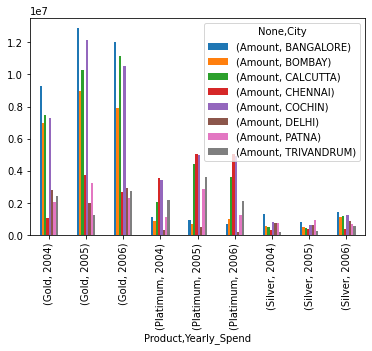

In [51]:
city_wise.plot(kind='bar')
plt.show()

4. Create graphs for


a. Monthly comparison of total spends, city wise

In [52]:
#CITY,Amount,Month
Customer_Spend['Monthly_Spend']=Customer_Spend['Month'].dt.month
Customer_Spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age_Group,Yearly_Spend,Monthly_Spend
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,senior,2004,1
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,senior,2004,1
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,senior,2004,1
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,senior,2004,1
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,senior,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,senior,2004,1
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,senior,2004,1
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,senior,2004,1
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,senior,2004,1


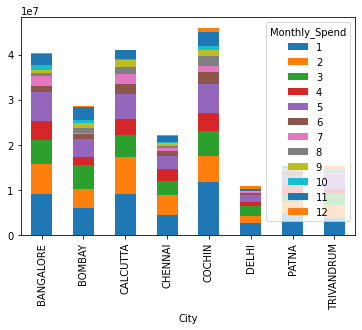

In [54]:
total_spend= pd.pivot_table(data =Customer_Spend , index=['City'], columns=['Monthly_Spend'],values='Amount', aggfunc='sum')
total_spend.plot(kind='bar',stacked=True)
plt.show()

b. Comparison of yearly spend on air tickets

In [58]:
Customer_Spend.Type.unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'TRAIN TICKET', 'BUS TICKET', 'AIR TICKET', 'MOVIE TICKET',
       'RENTAL', 'BIKE', 'AUTO', 'SHOPPING'], dtype=object)

In [130]:
air_ticket_spend=Customer_Spend.groupby(['Type','Yearly_Spend'])[['Amount']].sum().reset_index()
air_ticket_spend

,Type,Yearly_Spend,Amount
0,AIR TICKET,2004,4357225.35
1,AIR TICKET,2005,10550152.21
2,AIR TICKET,2006,5248469.56
3,AUTO,2004,254745.28
4,AUTO,2005,1192725.78
5,AUTO,2006,3358589.35
6,BIKE,2004,476635.28
7,BIKE,2005,4228406.18
8,BIKE,2006,2304748.07
9,BUS TICKET,2004,5822074.21


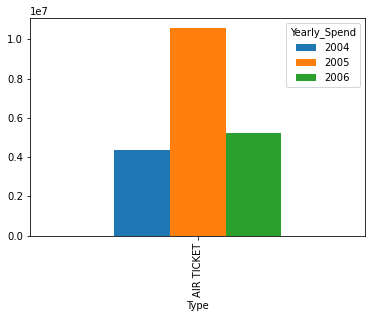

In [128]:
air_tickets_spend= pd.pivot_table(data =air_ticket_spend[air_ticket_spend.Type=='AIR TICKET'], index=['Type'], columns=['Yearly_Spend'],values='Amount', aggfunc='sum')
air_tickets_spend.plot(kind='bar')
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [131]:
product_spend=pd.pivot_table(data = Customer_Spend, index = 'Product', columns='Monthly_Spend', 
               values='Amount', aggfunc='sum')

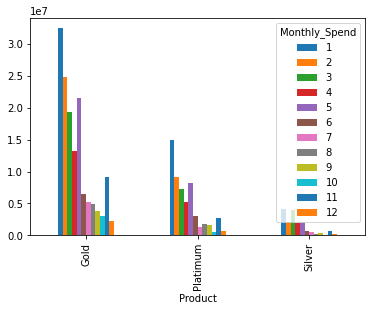

In [132]:
product_spend.plot(kind='bar')
plt.show()

5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [133]:
repaylimit

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00


In [159]:
repaylimit['Monthly']=repaylimit['Month'].dt.month
repaylimit['yearly']=repaylimit['Month'].dt.year

In [160]:
repaylimit

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Monthly,yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1,2004


In [205]:
def top10Customers(product_category,time_period):
    repaylimit['Product'] =product_category
    new=repaylimit.groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)
    return new
    

In [213]:
product_category=str(input("Please Enter Product Category( Gold/Silver/Platinum):"))
time_period=str(input("Please Enter Time Period (yearly/monthly):"))

Please Enter Product Category( Gold/Silver/Platinum):Gold
Please Enter Time Period (yearly/monthly):yearly


In [214]:
top10Customers_=top10Customers(product_category,time_period)

In [215]:
top10Customers_

,Customer,City,Product,yearly,Amount
173,A61,COCHIN,Gold,2005,4276860.55
116,A44,DELHI,Gold,2005,4165317.77
119,A45,COCHIN,Gold,2005,4042447.57
113,A43,BANGALORE,Gold,2005,4006956.60
14,A13,BANGALORE,Gold,2005,3757673.00
174,A61,COCHIN,Gold,2006,3744127.41
170,A60,CALCUTTA,Gold,2005,3742856.10
98,A39,TRIVANDRUM,Gold,2005,3699578.97
15,A13,BANGALORE,Gold,2006,3477314.89
66,A29,CALCUTTA,Gold,2006,3434298.00
